In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coffee Cooling

In this project, we are going to examine how coffee cools down to room temperature using Newton's Law of Cooling. We will then look at the best way to cool coffee to a desired temperature in a given amount of time.

The equation governing the cooling down of coffee is 
$$\frac{\mathrm{d} T(t)}{\mathrm{dt}}=-\frac{T(t)}{\tau},$$

where $T(t)$ is the temperature above ambient and $\tau$ is characteristic time constant that depends on the type of coffee. What this equation says is that the rate of change of the temperature with respect to time depends on what the temperature is at that time. In other words, the coffee will cool faster when it is hotter.

In order to solve this problem we need to know an intial condition: how hot (above ambient temperature) is the coffee when we start. For simplicity, let's call this temperature $T_0$

$$T(0)=T_0$$

Before we look to solving this problem, we have to introduce some concepts used in computational methods; numerical differentiation and root finding.

# Numerical Differentiation

You may remember from Leaving Cert. calculus, the derivative of a function at a point $a$ is formally defined as

$$\frac{\mathrm{d} f}{\mathrm{d}x}(a)=f'(a)=\lim_{h\to 0} \frac{f(a+h)-f(a)}{h}.$$

Computers don't know how to take limits, so we need a way to approximate derivatives. A very natural way to do this is to just pick a small value for $h$ in the above equation and look at the value of the derivative at our point $a$, so we have
$$f'(a)\approx \frac{f(a+h)-f(a)}{h}.$$

We call $h$ the step size. Our approximation gets better and better as our step size gets smaller. This method of approximating derivatives is called the forward difference method.

Write a function `forward_difference` which takes 3 arguments: a function, a point to evaluate the derivative of the function at, and a step size.

Let's do an example to test this function. We want to compare our derivative function to an actual derivative of a function.  Consider the polynomial $x^3-6 x^2+11 x-6$. Its derivative is $3x^2-12x+11$. Write a function which takes $x$ as an input and returns $x^3-6 x^2+11 x-6$. Write a second function which takes $x$ as an input and returns $3x^2-12x+11$.  On the same plot, plot the derivative and the approximation of the derivative between $0$ and $4$, using a step size of $h=0.1$. Label each graph appropriately.

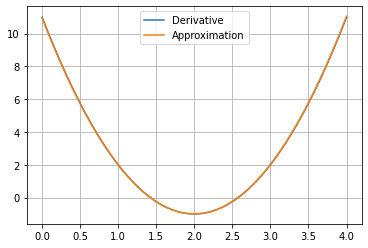

Plot the difference between the actual derivative and the approximated derivative. Repeat for a step size of $h=0.001$ and $h=0.0001$. What do you notice?

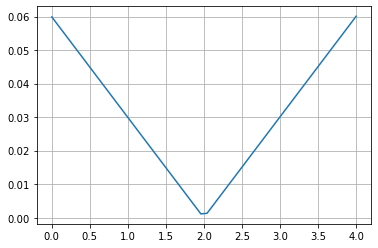

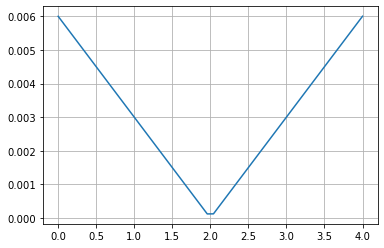

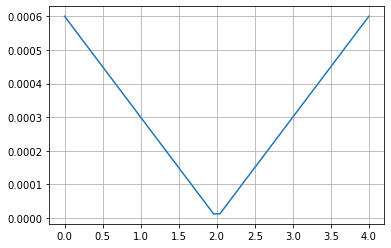

# Root Finding

Root finding methods do exactly what they say: they find where a function crosses the x-axis. Root finding methods are incredibly important because it isn't always possible to write down an equation for the roots of a function. Take for example the quadratic equation $ax^2+bx+c$. The roots of this polynomial are given by 

$$x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}.$$

Here we have a nice formula which gives the roots. This is an uncommon result. In fact, a general polynomial of degree 5 or higher does not have a formula for its roots. Moreover, what if the function we're working with isn't even a polynomial? We now turn to numerical methods to find the root of a function

Often the best place to start when root finding is to plot the function. Let's use the polynomial from above $x^3-6 x^2+11 x-6$.

Plot this polynomial from $0$ to $4$

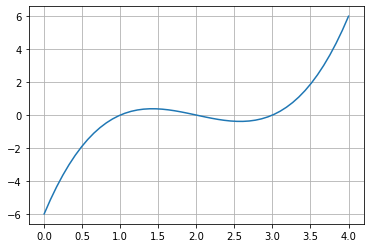

It easy to see here that the polynomial crosses the x-axis at $1,2,3$. What happens if we're given a polynomial that has roots which are less clear?

Write a function which takes $x$ as an input and returns $1.2x^3-6.6 x^2+11.21 x-6.8$ and plot it between $0$ and $4$

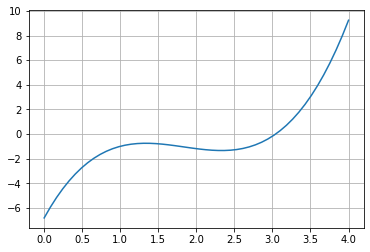

Now that we can't easily read the roots, how do we solve this problem? We use a method called bisection.

## Bisection

Suppose I picked a number between 1 and 100 and I asked you to guess it by asking yes/no questions. The first method that popped into your head was probably to ask if the number was greater than 50. If I said yes, you would then ask if it was greater than 75 and so on. If I said no, you would instead ask if it was greater than 25 and continue on. This method is known as bisection and is the simplest form of root finding.

The way we tie this into finding a root of a function is to say that the number I picked between 1 and 100 is the root. We're going to apply the exact same logic as above to find the root of a polynomial.

Looking at the graph of $1.2x^3-6.6 x^2+11.21 x-6.8$, we see that it has a root around 3. Let's zoom in around there. Plot the polynomial again, this time between $2.5$ and $3.5$ and draw a horizontal line at $y=0$  

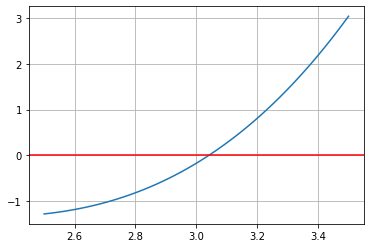

We now see that the root lies between say $3$ and $3.2$ 

Plot the polynomial between $2.5$ and $3.5$. Draw a vertical line at the x-values $3$, $3.1$, and $3.2$, labelling the line at $3.1$ as "Midpoint" and colouring it differently to the other 2 lines.

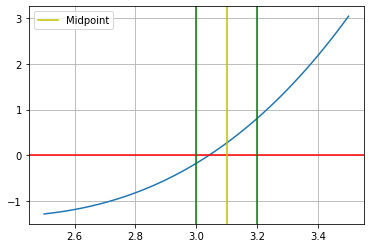

Here we see that the root lies between $3$ and $3.1$. Repeat the above steps using $3$ and $3.1$ as our new bounds, but plot the polynomial between $2.7$ and $3.3$

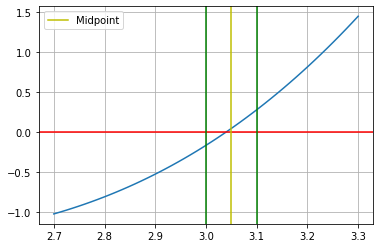

You can see now that we get closer and closer to the root with each iteration. It's important now to talk about the idea of tolerence. Tolerence is a number that you pick to tell you how close you want to get to the root. If you want to get very close to a root, you pick a small tolerence.

It's also important to make sure that the root lies between the initial numbers you pick. This is why is it beneficial to plot the function first.

We can summerise the method as follows: 

1. Select two points, $(a,b)$, with $f(a)<0<f(b)$ (there's a root between $a$ and $b$ ) and select a tolerence for how close to the root you want to get.
2. Calculate the midpoint $m=\frac{a+b}{2}$
3. If $f(m)<0$, go back to step one and use the range $(m,b)$. If $f(m)>0$, go back to step one and use the range $(a,m)$.
4. Repeat this until you satisfy the tolerence.

Write a function `Find_Root_Bisection` which takes 4 arguments, a function `f`, a left value `a`, a right values `b`, and a tolerence `tol`, and root finds.

Apply that function to the polynomial we've been working with, and use a tolerence of $10{^-6}$

(Don't forget to use `np.vectorise`to use a function as an argument)

3.0406440734863276


# Numerical Solution of Newton's Law of Cooling

Now that we have the necessary tools, let's return to Newton's Law of Cooling:
$$\frac{\mathrm{d} T(t)}{\mathrm{dt}}=-\frac{T(t)}{\tau},$$
We apply our forward-difference approximation
$$T'(a)\approx \frac{T(a+h)-T(a)}{h},$$
to change the first equation into 
$$\frac{T(a+h)-T(a)}{h}=-\frac{T(a)}{\tau}.$$
We can isolate $T(a+h)$ on the left to get
$$T(a+h)=T(a)\left(1-\frac{h}{\tau}\right).$$

This method solves the cooling equation at discrete points, given by $nh,$ where $n=1,2,\ldots$. The last equation gives a relationship between the temperature at the current point $T(a)$ and the temperature at the next point $T(a+h)$.

Using the above equation, write a function `Next_T` which takes three inputs `Ta` the current temperature, `tau` the characteristic cooling time, and `h` a step size and returns the temperature at the next step.

Now write a function `Final_T` which takes 4 inputs `T0` an initial temperature, `tau` the characteristic cooling constant, `time` the amount of minutes you want the coffee to cool for, and `h` the step size and returns the temperature at the end of the cooling period.

Note: to prevent issues where your step size doesn't divide your final time properly, use the following:

`h = float(h)
 N = int(round(time/h))
 time = N*h`

Modify the function you just wrote to return two lists, a list of times and a list of the temperatures at those times.

The $\tau$ for black coffee is 32 minutes. White coffee has a $\tau$ of 38 minutes. On the same graph, using the above function, plot the temperature as a function of time for black and white coffee starting at 78 degrees above ambient and cooling for 20 minutes.

Let's say you want your coffee to be a particular temperature after a given amount of time. What temperature will your coffee have to be at the start to achieve this? Let's say that the room temperature is $22\, \mathrm{C}$ and you don't want to burn the coffee, so the maximum initial temperature is $100\, \mathrm{C}$ which corresponds to a temperature above ambient of $78$.  Using the functions you have already written, write a new function which calculates what temperature the coffee has to start at:

`initial_temp_finder(Tf, tau, time, h, tol)`

where `Tf` is the final temperature you want the coffee to be at, `tau` is its characteristic cooling time, `time` is the amount of time you want it to cool for, `h` is the step size of the solver, and `tol` is how close to the final temperature you want to get to